C:\Users\Neil\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='totlngth', ylabel='hdlngth'>

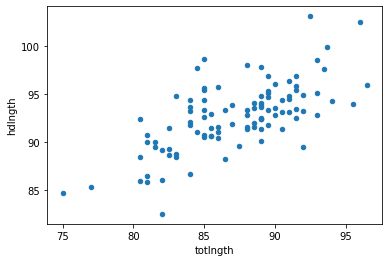

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#%matplotlib notebook

df = pd.read_csv("2.4.2 Possum Data.csv")

#drop empty rows in age column to match arff file provided
df = df.dropna(subset = ["age"]) 

#filter the two columns to be used: head length and total length
df[["hdlngth","totlngth"]]

df.plot(kind="scatter", x="totlngth", y="hdlngth")

In [2]:
# test train split for supervised training
X_train, X_test, y_train, y_test = train_test_split(df.totlngth, df.hdlngth, test_size=0.33)

Text(0, 0.5, 'Head Length')

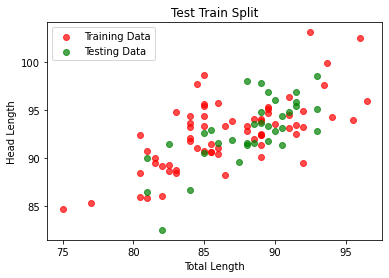

In [3]:
# test train split visualisation
plt.scatter(X_train, y_train, label="Training Data", color="r", alpha=.7)
plt.scatter(X_test, y_test, label="Testing Data", color="g", alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.xlabel('Total Length')
plt.ylabel('Head Length')

In [4]:
# create linear model and train it
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1),y_train.values)

LinearRegression()

Text(0, 0.5, 'Head Length')

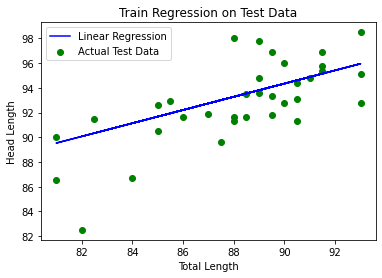

In [5]:
# use model to predict test data
prediction = LR.predict(X_test.values.reshape(-1,1))

#plot prediction line against actual test data
plt.plot(X_test, prediction, label="Linear Regression", color="b")
plt.scatter(X_test, y_test, label="Actual Test Data", color="g")
plt.legend()
plt.title("Train Regression on Test Data")
plt.xlabel('Total Length')
plt.ylabel('Head Length')

In [6]:
# predict value
LR.predict(np.array([[86]]))[0]

92.20479367930137

In [7]:
# score this model
LR.score(X_test.values.reshape(-1,1),y_test.values)

0.4576316139978952

In [8]:
#display regression coefficients and R-squared value of model
print(LR.intercept_, LR.coef_)
#https://www.statology.org/sklearn-linear-regression-summary/

46.165619108671834 [0.53533924]
